<a href="https://colab.research.google.com/github/Heesung0706/Heesung.Hwnag/blob/main/%EA%B3%BC%EC%A0%9C_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 0. 라이브러리 불러오기

In [15]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. 데이터 불러오기

In [18]:
corpus = ['주기적으로 새로운 친구를 만든다',
          '자유 시간 중 상당 부분을 다양한 관심사를 탐구하는데 할애한다',
          '다른 사람이 울고 있는 모습을 보면 자신도 울고 싶어질 때가 많다',
          '일이 잘못될 때를 대비해 여러 대비책을 세우는 편이다',
          '압박감이 심한 환경에서도 평정심을 유지하는 편이다',
          '파티나 행사에서 새로운 사람에게 먼저 자신을 소개하기보다는 주로 이미 알고 있는 사람과 대화하는 편이다',
          '하나의 프로젝트를 완전히 완료한 후 다른 프로젝트를 시작하는 편이다',
          '매우 감상적인 편이다',
          '일정이나 목록으로 계획을 세우는 일을 좋아한다',
          '작은 실수로도 자신의 능력이나 지식을 의심하곤 한다',
          '관심이 가는 사람에게 다가가서 대화를 시작하기가 어렵지 않다',
          '예술 작품의 다양한 해석에 대해 토론하는 일에는 크게 관심이 없다',
          '감정보다는 이성을 따르는 편이다',
          '하루 일정을 계획하기보다는 즉흥적으로 하고 싶은 일을 하는 것을 좋아한다',
          '다른 사람에게 자신이 어떤 사람으로 보일지 걱정하지 않는 편이다',
          '단체 활동에 참여하는 일을 즐긴다',
          '결말을 자신의 방식으로 해석할 수 있는 책과 영화를 좋아한다',
          '자신보다는 남의 성공을 돕는 일에서 더 큰 만족감을 느낀다',
          '관심사가 너무 많아 다음에 어떤 일을 해야 할지 모를 때가 있다',
          '일이 잘못될까봐 자주 걱정하는 편이다',
          '자신에게 예술적 성향이 거의 없다고 생각한다',
          '사람들이 감정보다는 이성을 중시했다면 더 나은 세상이 되었으리라고 생각한다',
          '휴식을 취하기 전에 집안일을 먼저 끝내기를 원한다',
          '다른 사람의 논쟁을 바라보는 일이 즐겁다',
          '다른 사람의 주의를 끌지 않으려고 하는 편이다',
          '감정이 매우 빠르게 변하곤 한다',
          '자신만큼 효율적이지 못한 사람을 보면 짜증이 난다',
          '해야 할 일을 마지막까지 미룰때가 많다',
          '사후세계에 대한 질문이 흥미롭다고 생각한다',
          '혼자보다는 다른 사람과 시간을 보내고 싶어한다',
          '이론 중심의 토론에는 관심이 없으며 원론적인 이야기는 지루하다고 생각한다',
          '자신과 배경이 완전히 다른 사람에게도 쉽게 공감할 수 있다',
          '결정을 내리는 일을 마지막까지 미루는 편이다',
          '이미 내린 결정에 대해서는 다시 생각하지 않는 편이다',
          '혼자만의 시간을 보내기보다는 즐거운 파티와 행사로 일주일의 피로를 푸는 편이다',
          '미술관에 가는 일을 좋아한다',
          '다른 사람의 감정을 이해하기 힘들 때가 많다',
          '매일 할 일을 계획하는 일을 좋아한다',
          '불안함을 느낄 때가 거의 없다',
          '전화 통화를 거는 일은 가능한 피하고 싶다',
          '자신의 의견과 매우 다른 의견을 이해하기 위해 많은 시간을 할애하곤 한다',
          '친구에게 먼저 만나자고 연락하는 편이다',
          '계획에 차질이 생기면 최대한 빨리 계획으로 돌아가기 위해 노력한다',
          '오래전의 실수를 후회할 때가 많다',
          '인간의 존재와 삶의 이유에 대해 깊이 생각하지 않는 편이다',
          '감정을 조절하기보다는 감정에 휘둘리는 편이다',
          '상대방의 잘못이라는 것이 명백할 때도 상대방의 체면을 살려주기 위해 노력한다',
          '계획에 따라 일관성 있게 업무를 진행하기보다는 즉흥적인 에너지로 업무를 몰아서 처리하는 편이다',
          '상대방이 자신을 높게 평가하면 나중에 상대방이 실망하게 될까 걱정하곤 한다',
          '대부분의 시간을 혼자서 일할 수 있는 직업을 원한다',
          '철학적인 질문에 대해 깊게 생각하는 일은 시간 낭비라고 생각한다',
          '조용하고 사적인 장소보다는 사람들로 붐비고 떠들썩한 장소를 좋아한다',
          '상대방의 감정을 바로 알아차릴 수 있다',
          '무엇인가에 압도당하는 기분을 느낄 때가 많다',
          '단계를 건너뛰는 일 없이 절차대로 일을 완수하는 편이다',
          '논란이 되거나 논쟁을 불러일으킬 수 있는 주제에 관심이 많다',
          '자신보다 다른 사람에게 더 필요한 기회라고 생각되면 기회를 포기할 수도 있다',
          '마감 기한을 지키기가 힘들다',
          '일이 원하는대로 진행될 것이라는 자신감이 있다']

# 2. 데이터 전처리

## 문장 속 단어 - 중복 제거

In [24]:
words = []
for text in corpus:
  for word in text. split(' '):
    words.append(word)

In [25]:
words = set(words)

In [26]:
words

{'가는',
 '가능한',
 '감상적인',
 '감정보다는',
 '감정에',
 '감정을',
 '감정이',
 '거는',
 '거의',
 '걱정하곤',
 '걱정하는',
 '걱정하지',
 '건너뛰는',
 '것을',
 '것이',
 '것이라는',
 '결말을',
 '결정에',
 '결정을',
 '계획에',
 '계획으로',
 '계획을',
 '계획하기보다는',
 '계획하는',
 '공감할',
 '관심사가',
 '관심사를',
 '관심이',
 '기분을',
 '기한을',
 '기회라고',
 '기회를',
 '깊게',
 '깊이',
 '끌지',
 '끝내기를',
 '나은',
 '나중에',
 '난다',
 '남의',
 '낭비라고',
 '내리는',
 '내린',
 '너무',
 '노력한다',
 '논란이',
 '논쟁을',
 '높게',
 '느낀다',
 '느낄',
 '능력이나',
 '다가가서',
 '다른',
 '다시',
 '다양한',
 '다음에',
 '단계를',
 '단체',
 '대부분의',
 '대비책을',
 '대비해',
 '대한',
 '대해',
 '대해서는',
 '대화를',
 '대화하는',
 '더',
 '돌아가기',
 '돕는',
 '되거나',
 '되었으리라고',
 '될까',
 '따라',
 '따르는',
 '때가',
 '때도',
 '때를',
 '떠들썩한',
 '마감',
 '마지막까지',
 '만나자고',
 '만든다',
 '만족감을',
 '많다',
 '많아',
 '많은',
 '매우',
 '매일',
 '먼저',
 '명백할',
 '모를',
 '모습을',
 '목록으로',
 '몰아서',
 '못한',
 '무엇인가에',
 '미루는',
 '미룰때가',
 '미술관에',
 '바라보는',
 '바로',
 '방식으로',
 '배경이',
 '변하곤',
 '보내고',
 '보내기보다는',
 '보면',
 '보일지',
 '부분을',
 '불러일으킬',
 '불안함을',
 '붐비고',
 '빠르게',
 '빨리',
 '사람과',
 '사람들로',
 '사람들이',
 '사람에게',
 '사람에게도',
 '사람으로',
 '사람을',
 '사람의',
 '사람이',
 '

## 단어별 인덱스 매핑 테이블 만들기

In [27]:
word2int = {}
for i, word in enumerate(words):
  word2int[word] = i

In [29]:
word2int

{'시간을': 0,
 '알아차릴': 1,
 '계획으로': 2,
 '깊게': 3,
 '돌아가기': 4,
 '압도당하는': 5,
 '건너뛰는': 6,
 '다양한': 7,
 '참여하는': 8,
 '일관성': 9,
 '할애한다': 10,
 '심한': 11,
 '일할': 12,
 '논쟁을': 13,
 '휘둘리는': 14,
 '힘들': 15,
 '직업을': 16,
 '실수로도': 17,
 '토론하는': 18,
 '예술적': 19,
 '전화': 20,
 '관심이': 21,
 '끌지': 22,
 '감정이': 23,
 '이미': 24,
 '사람들이': 25,
 '할지': 26,
 '피로를': 27,
 '노력한다': 28,
 '될까': 29,
 '있게': 30,
 '오래전의': 31,
 '장소를': 32,
 '소개하기보다는': 33,
 '되었으리라고': 34,
 '남의': 35,
 '지키기가': 36,
 '일에서': 37,
 '때를': 38,
 '일을': 39,
 '대비해': 40,
 '의견을': 41,
 '감정보다는': 42,
 '나은': 43,
 '진행하기보다는': 44,
 '차질이': 45,
 '자신이': 46,
 '장소보다는': 47,
 '혼자보다는': 48,
 '싶어한다': 49,
 '불러일으킬': 50,
 '시간': 51,
 '때가': 52,
 '능력이나': 53,
 '다음에': 54,
 '업무를': 55,
 '것을': 56,
 '더': 57,
 '불안함을': 58,
 '무엇인가에': 59,
 '실망하게': 60,
 '좋아한다': 61,
 '주의를': 62,
 '원론적인': 63,
 '빨리': 64,
 '해석에': 65,
 '너무': 66,
 '편이다': 67,
 '않다': 68,
 '책과': 69,
 '친구에게': 70,
 '사람이': 71,
 '시작하는': 72,
 '힘들다': 73,
 '일은': 74,
 '체면을': 75,
 '감상적인': 76,
 '공감할': 77,
 '자신보다': 78,
 '느낄': 79,
 '수': 80,
 '위해': 81,
 '자주': 8

## Skip gram 방식으로 입력갑과 레이블 설정(윈도우는 2로 설정)

In [32]:
sentences = []
for sentence in corpus:
  sentences.append(sentence.split())

In [36]:
window_size = 2
data = []
for sentence in sentences:
  for idx, word in enumerate(sentence):
    for neighbor in sentence[max(idx-window_size, 0): min(idx+window_size, len(sentence))+1]:
      if neighbor != word:
        data.append([word, neighbor])

In [43]:
df = pd.DataFrame(data, columns = ['input','label'])
df.head(10)

,input,label
0,주기적으로,새로운
1,주기적으로,친구를
2,새로운,주기적으로
3,새로운,친구를
4,새로운,만든다
5,친구를,주기적으로
6,친구를,새로운
7,친구를,만든다
8,만든다,새로운
9,만든다,친구를


## 각 단어를 원 핫 인코딩 형식으로 변환

In [44]:
ONE_HOT_DIM = len(words)  # 12 / words

In [45]:
def to_one_hot_encoding(data_point_index):
  one_hot_encoding = np.zeros(ONE_HOT_DIM)
  one_hot_encoding[data_point_index] = 1
  return one_hot_encoding

In [52]:
X = []
Y = []

In [54]:
for x,y in zip(df['input'], df['label']):
  X.append(to_one_hot_encoding(word2int[x]))
  Y.append(to_one_hot_encoding(word2int[y]))

In [55]:
X_train = np.array(X)
Y_train = np.array(Y)

# 3. Word2vec 모델 구현

In [56]:
encording_dim = 2
input_word = Input(shape=(ONE_HOT_DIM,))
encoded = Dense(encording_dim, use_bias=False)(input_word)
decoded = Dense(ONE_HOT_DIM, activation='softmax')(encoded)

In [57]:
w2v_model = Model(input_word, decoded)
w2v_model.compile(optimizer='adam', loss='categorical_crossentropy')

## 모델 학습

In [58]:
w2v_model.fit(X_train, Y_train, epochs=1000, shuffle=True, verbose=1)

Epoch 1/1000
45/45 [==============================] - 1s 3ms/step - loss: 5.7414
Epoch 2/1000
45/45 [==============================] - 0s 3ms/step - loss: 5.7337
Epoch 3/1000
45/45 [==============================] - 0s 3ms/step - loss: 5.7275
Epoch 4/1000
45/45 [==============================] - 0s 3ms/step - loss: 5.7215
Epoch 5/1000
45/45 [==============================] - 0s 3ms/step - loss: 5.7153
Epoch 6/1000
45/45 [==============================] - 0s 3ms/step - loss: 5.7090
Epoch 7/1000
45/45 [==============================] - 0s 2ms/step - loss: 5.7024
Epoch 8/1000
45/45 [==============================] - 0s 2ms/step - loss: 5.6956
Epoch 9/1000
45/45 [==============================] - 0s 2ms/step - loss: 5.6885
Epoch 10/1000
45/45 [==============================] - 0s 2ms/step - loss: 5.6807
Epoch 11/1000
45/45 [==============================] - 0s 2ms/step - loss: 5.6725
Epoch 12/1000
45/45 [==============================] - 0s 2ms/step - loss: 5.6638
Epoch 13/1000
45/45 [====

In [59]:
w2v_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 312)]             0         
                                                                 
 dense (Dense)               (None, 2)                 624       
                                                                 
 dense_1 (Dense)             (None, 312)               936       
                                                                 
Total params: 1560 (6.09 KB)
Trainable params: 1560 (6.09 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# 4. Word2Vec 임베딩 추출 및 시각화

In [62]:
vectors = w2v_model.layers[1].weights[0].numpy().tolist()

In [63]:
vectors

[[0.8211926221847534, 0.6302819848060608],
 [2.3113229274749756, -3.035947322845459],
 [0.8916717171669006, 3.5684471130371094],
 [0.2857171595096588, 4.249233245849609],
 [1.0751227140426636, 2.8146400451660156],
 [-3.911834478378296, -9.898405075073242],
 [-10.066822052001953, -4.20939826965332],
 [-3.473111391067505, 9.601192474365234],
 [-10.145435333251953, 0.9953997731208801],
 [1.0782109498977661, 12.078812599182129],
 [-3.895428419113159, 9.16192626953125],
 [-2.77902889251709, -1.1263468265533447],
 [1.913004994392395, -0.5068244338035583],
 [2.030198097229004, -2.2224185466766357],
 [-0.5819713473320007, -0.020246203988790512],
 [-0.13457925617694855, -1.9665706157684326],
 [2.973301649093628, -1.190394639968872],
 [10.245600700378418, 2.037142753601074],
 [-1.4579622745513916, 1.805629849433899],
 [2.632031202316284, -6.867747783660889],
 [8.72482681274414, 8.884766578674316],
 [-0.847480297088623, -1.5349838733673096],
 [-0.686125636100769, -0.7696992754936218],
 [2.6988635

In [64]:
w2v_df = pd.DataFrame(vectors, columns=['x1','x2'])
w2v_df['word'] = list(words)
w2v_df = w2v_df[['word','x1','x2']]
w2v_df

,word,x1,x2
0,시간을,0.821193,0.630282
1,알아차릴,2.311323,-3.035947
2,계획으로,0.891672,3.568447
3,깊게,0.285717,4.249233
4,돌아가기,1.075123,2.814640
...,...,...,...
307,만나자고,0.276114,1.205782
308,어렵지,-8.285602,-9.622369
309,상대방이,5.075563,8.656201
310,크게,-0.926646,-0.157895


## 추출한 임베딩 값 시각화

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50508 (\N{HANGUL SYLLABLE AL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50500 (\N{HANGUL SYLLABLE A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47540 (\N{HANGUL SYLLABLE RIL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPyt

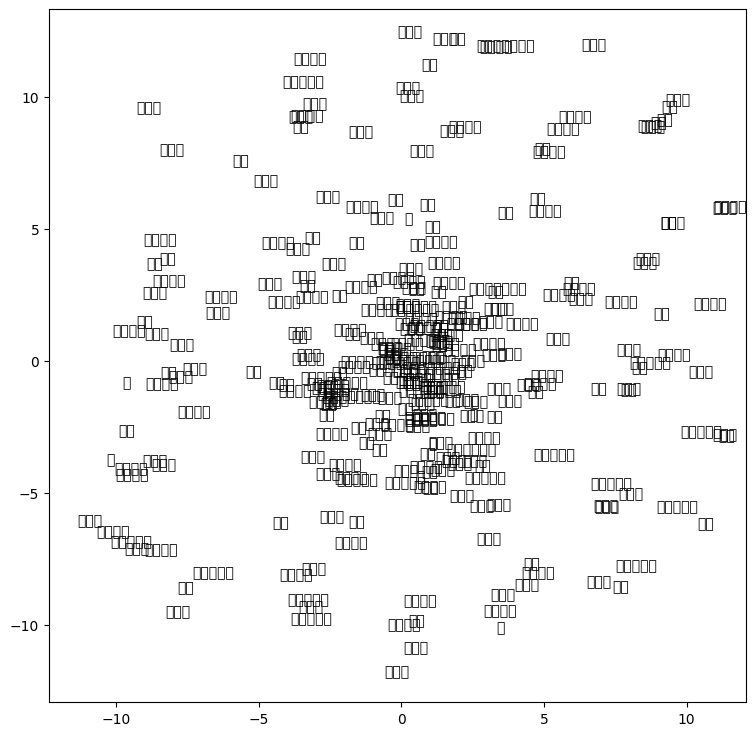

In [68]:
fig, ax = plt.subplots()

for word, x1, x2 in zip(w2v_df['word'], w2v_df['x1'], w2v_df['x2']):
    ax. annotate(word, (x1,x2))

PADDING = 1.0
x_axis_min = np.min(vectors, axis=0)[0] - PADDING
y_axis_min = np.min(vectors, axis=0)[1] - PADDING
x_axis_max = np.max(vectors, axis=0)[0] + PADDING
y_axis_max = np.max(vectors, axis=0)[1] + PADDING

plt.xlim(x_axis_min,x_axis_max)
plt.ylim(y_axis_min,y_axis_max)
plt.rcParams["figure.figsize"] = (9,9)

plt.show()